In [226]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from IPython.display import display
%matplotlib inline

# Deutsch-Jozsa Algorithm

Uf is a unitary transformation that acts on input qubits and an output qubit. The input qubits is the first N qubits, and the output qubit is the last qubit. The unitary transformation Uf is defined as follows:

In [227]:
def Uf1(qc, q):
    pass # do nothing

def Uf2(qc, q):
    qc.x(q[-1]) # apply X-gate to the output qubit
    
def Uf3(qc, q):
    qc.cx(q[:-1], q[-1]) # apply CNOT-gate with the first N qubits as control and the output qubit as target
    
def Uf4(qc, q):
    qc.x(q[-1]) # apply X-gate to the output qubit
    qc.cx(q[:-1], q[-1]) # apply CNOT-gate with the first N qubits as control and the output qubit as target

oracles = {"f(x)=0": Uf1, "f(x)=1": Uf2, "f(x)=x": Uf3, "f(x)=~x": Uf4}
backend = Aer.get_backend('qasm_simulator')

N is the number of input qubits. N = 1 for the basic Deutsch algorithm, and N > 1 for the generalized Deutsch-Jozsa algorithm.

In [228]:
N = 3 # number of input qubits
q = QuantumRegister(N + 1, "q") # N input qubits and 1 output qubit
c = ClassicalRegister(N, "c") # N classical bits

The first N qubits is initialized to ∣0⟩, and the last qubit is initialized to ∣1⟩ via the X-gate.

In [229]:
def deutsch_jozsa(uf, N):
    circuit = QuantumCircuit(q, c, name='Deutsch-Jozsa')
    circuit.x(N) # initialize the last qubit to |1> (q[0..N-1] = |0> and q[N] = |1>)
    circuit.barrier()
    circuit.h(q) # apply H-gates to all qubits: |0> -> (|0> + |1>)/sqrt(2), |1> -> (|0> - |1>)/sqrt(2)
    circuit.barrier()
    uf(circuit, q) # apply the unitary transformation Uf
    circuit.barrier()
    circuit.h(q[:-1]) # apply H-gates to the first N qubits
    circuit.barrier()
    return circuit

Run the Deutsch-Jozsa algorithm with each possible function f(x) and save the measurement results.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

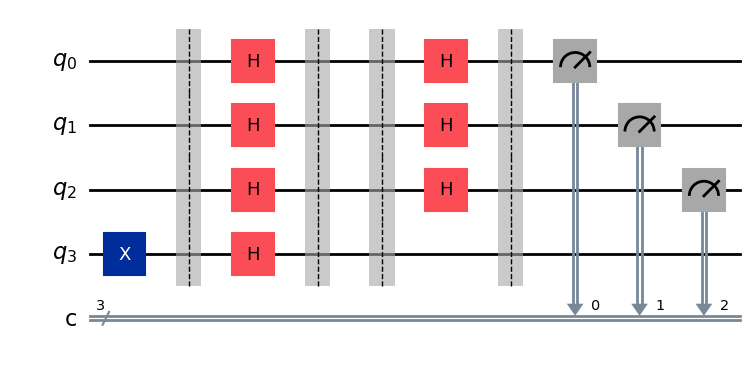

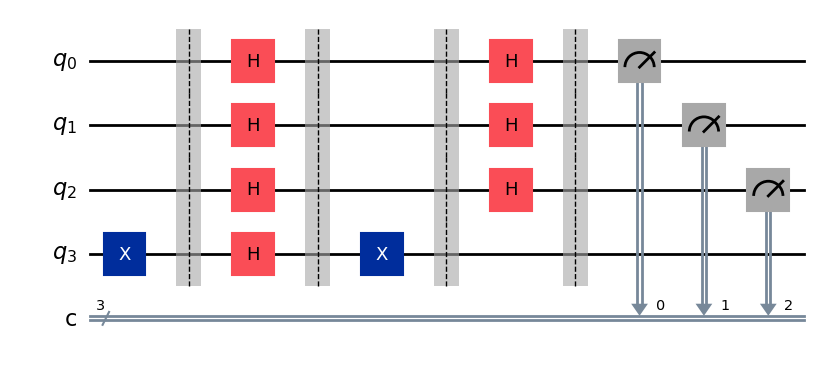

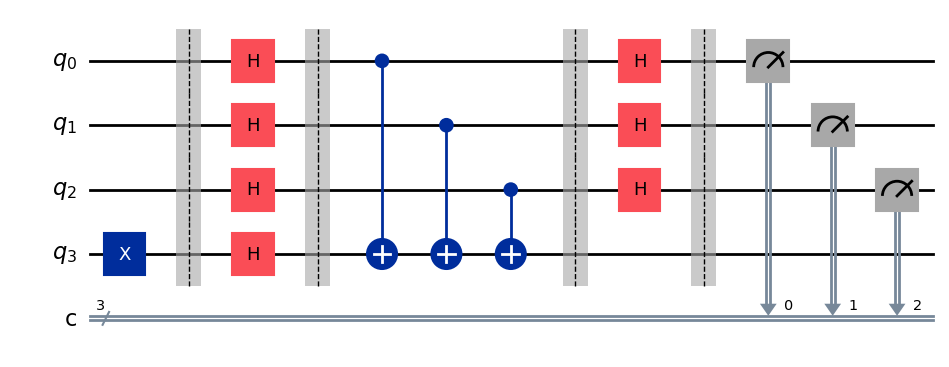

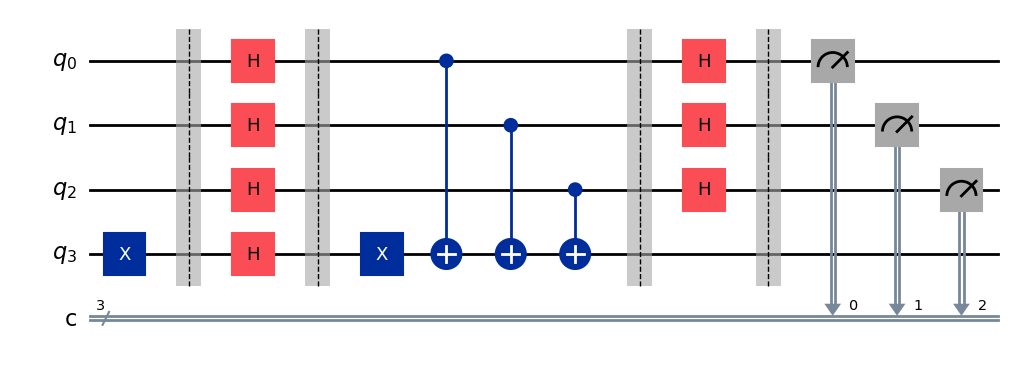

In [230]:
results = []
for name, oracle in oracles.items():
    circuit = deutsch_jozsa(oracle, N)
    state = Statevector.from_int(0, 2**(N+1))
    state = state.evolve(circuit)
    draw = state.draw('latex')
    display(draw)
    meas = QuantumCircuit(N, N)
    meas.measure(range(N), range(N)) # measure the input qubits
    circuit = circuit.compose(meas) # compose the quantum circuit with the measurement circuit
    circuit.draw('mpl')
    compiled = transpile(circuit, backend)
    results.append((name, backend.run(circuit, shots=1024).result().get_counts()))

Display the measurement results. The measurement result should be all zeros for the constant functions, and non-zero for the balanced functions.

In [231]:
for name, res in results:
    print(f"Oracle '{name}' yields measurement result: {res}")

Oracle 'f(x)=0' yields measurement result: {'000': 1024}
Oracle 'f(x)=1' yields measurement result: {'000': 1024}
Oracle 'f(x)=x' yields measurement result: {'111': 1024}
Oracle 'f(x)=~x' yields measurement result: {'111': 1024}
